In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 2048.", name="epoch 50")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(2048, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=50, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2048)              16801792  
                                                                 
 dense (Dense)               (None, 25)                51225     
                                                                 
Total params: 16,853,017
Trainable params: 16,853,017
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 5.2815 - mae: 1.8030

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.4s


5/5 [==============================] - 9s 2s/step - loss: 5.2815 - mae: 1.8030 - val_loss: 0.7457 - val_mae: 0.7478
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.9063 - mae: 0.8412

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.9063 - mae: 0.8412 - val_loss: 0.4286 - val_mae: 0.5368
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.2845 - mae: 0.4334

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.2845 - mae: 0.4334 - val_loss: 0.2300 - val_mae: 0.3936
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.2335 - mae: 0.3992

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.2335 - mae: 0.3992 - val_loss: 0.1966 - val_mae: 0.3695
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.1866 - mae: 0.3586

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1866 - mae: 0.3586 - val_loss: 0.1836 - val_mae: 0.3613
Epoch 6/50
5/5 [==============================] - 1s 228ms/step - loss: 0.1903 - mae: 0.3623 - val_loss: 0.1863 - val_mae: 0.3623
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.1869 - mae: 0.3590

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.5s


5/5 [==============================] - 6s 1s/step - loss: 0.1869 - mae: 0.3590 - val_loss: 0.1794 - val_mae: 0.3549
Epoch 8/50
5/5 [==============================] - 1s 223ms/step - loss: 0.1780 - mae: 0.3513 - val_loss: 0.1805 - val_mae: 0.3534
Epoch 9/50
5/5 [==============================] - 1s 223ms/step - loss: 0.1825 - mae: 0.3541 - val_loss: 0.1840 - val_mae: 0.3554
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.1827 - mae: 0.3554

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1827 - mae: 0.3554 - val_loss: 0.1777 - val_mae: 0.3527
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.1781 - mae: 0.3511

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 1s/step - loss: 0.1781 - mae: 0.3511 - val_loss: 0.1768 - val_mae: 0.3522
Epoch 12/50
5/5 [==============================] - 1s 227ms/step - loss: 0.1787 - mae: 0.3516 - val_loss: 0.1772 - val_mae: 0.3528
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.1776 - mae: 0.3504

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.5s


5/5 [==============================] - 6s 2s/step - loss: 0.1776 - mae: 0.3504 - val_loss: 0.1765 - val_mae: 0.3513
Epoch 14/50
5/5 [==============================] - 1s 223ms/step - loss: 0.1774 - mae: 0.3500 - val_loss: 0.1775 - val_mae: 0.3504
Epoch 15/50
5/5 [==============================] - 1s 221ms/step - loss: 0.1782 - mae: 0.3504 - val_loss: 0.1774 - val_mae: 0.3507
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 0.1785 - mae: 0.3514

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1785 - mae: 0.3514 - val_loss: 0.1764 - val_mae: 0.3522
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 0.1772 - mae: 0.3501

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1772 - mae: 0.3501 - val_loss: 0.1756 - val_mae: 0.3503
Epoch 18/50
5/5 [==============================] - 1s 228ms/step - loss: 0.1776 - mae: 0.3499 - val_loss: 0.1761 - val_mae: 0.3501
Epoch 19/50
5/5 [==============================] - 1s 222ms/step - loss: 0.1769 - mae: 0.3494 - val_loss: 0.1757 - val_mae: 0.3520
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 0.1766 - mae: 0.3494

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 1s/step - loss: 0.1766 - mae: 0.3494 - val_loss: 0.1744 - val_mae: 0.3497
Epoch 21/50
5/5 [==============================] - 1s 229ms/step - loss: 0.1756 - mae: 0.3479 - val_loss: 0.1753 - val_mae: 0.3487
Epoch 22/50
5/5 [==============================] - 1s 225ms/step - loss: 0.1771 - mae: 0.3489 - val_loss: 0.1759 - val_mae: 0.3501
Epoch 23/50
5/5 [==============================] - 1s 232ms/step - loss: 0.1775 - mae: 0.3502 - val_loss: 0.1745 - val_mae: 0.3506
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 0.1760 - mae: 0.3488

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.1760 - mae: 0.3488 - val_loss: 0.1735 - val_mae: 0.3472
Epoch 25/50
5/5 [==============================] - 1s 229ms/step - loss: 0.1777 - mae: 0.3488 - val_loss: 0.1780 - val_mae: 0.3484
Epoch 26/50
5/5 [==============================] - 1s 224ms/step - loss: 0.1761 - mae: 0.3480 - val_loss: 0.1746 - val_mae: 0.3495
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 0.1751 - mae: 0.3479

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.5s


5/5 [==============================] - 6s 1s/step - loss: 0.1751 - mae: 0.3479 - val_loss: 0.1729 - val_mae: 0.3492
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 0.1753 - mae: 0.3479

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.4s


5/5 [==============================] - 7s 2s/step - loss: 0.1753 - mae: 0.3479 - val_loss: 0.1727 - val_mae: 0.3458
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 0.1737 - mae: 0.3457

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 1s/step - loss: 0.1737 - mae: 0.3457 - val_loss: 0.1720 - val_mae: 0.3478
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 0.1757 - mae: 0.3481

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.1757 - mae: 0.3481 - val_loss: 0.1705 - val_mae: 0.3462
Epoch 31/50
5/5 [==============================] - 1s 230ms/step - loss: 0.1733 - mae: 0.3458 - val_loss: 0.1714 - val_mae: 0.3439
Epoch 32/50
5/5 [==============================] - 1s 230ms/step - loss: 0.1725 - mae: 0.3449 - val_loss: 0.1709 - val_mae: 0.3462
Epoch 33/50
5/5 [==============================] - ETA: 0s - loss: 0.1709 - mae: 0.3436

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 7s 2s/step - loss: 0.1709 - mae: 0.3436 - val_loss: 0.1693 - val_mae: 0.3440
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 0.1719 - mae: 0.3439

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.1719 - mae: 0.3439 - val_loss: 0.1677 - val_mae: 0.3424
Epoch 35/50
5/5 [==============================] - 1s 232ms/step - loss: 0.1695 - mae: 0.3422 - val_loss: 0.1679 - val_mae: 0.3403
Epoch 36/50
5/5 [==============================] - 1s 231ms/step - loss: 0.1700 - mae: 0.3414 - val_loss: 0.1680 - val_mae: 0.3414
Epoch 37/50
5/5 [==============================] - ETA: 0s - loss: 0.1696 - mae: 0.3419

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.1696 - mae: 0.3419 - val_loss: 0.1636 - val_mae: 0.3383
Epoch 38/50
5/5 [==============================] - ETA: 0s - loss: 0.1657 - mae: 0.3380

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.1657 - mae: 0.3380 - val_loss: 0.1612 - val_mae: 0.3347
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 0.1646 - mae: 0.3362

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.1646 - mae: 0.3362 - val_loss: 0.1595 - val_mae: 0.3333
Epoch 40/50
5/5 [==============================] - ETA: 0s - loss: 0.1588 - mae: 0.3301

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 7s 2s/step - loss: 0.1588 - mae: 0.3301 - val_loss: 0.1558 - val_mae: 0.3307
Epoch 41/50
5/5 [==============================] - 1s 235ms/step - loss: 0.1541 - mae: 0.3253 - val_loss: 0.1757 - val_mae: 0.3506
Epoch 42/50
5/5 [==============================] - ETA: 0s - loss: 0.1697 - mae: 0.3391

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.1697 - mae: 0.3391 - val_loss: 0.1535 - val_mae: 0.3288
Epoch 43/50
5/5 [==============================] - 1s 233ms/step - loss: 0.2087 - mae: 0.3696 - val_loss: 0.1601 - val_mae: 0.3350
Epoch 44/50
5/5 [==============================] - 1s 229ms/step - loss: 0.1676 - mae: 0.3374 - val_loss: 0.1784 - val_mae: 0.3458
Epoch 45/50
5/5 [==============================] - 1s 228ms/step - loss: 0.1727 - mae: 0.3428 - val_loss: 0.1691 - val_mae: 0.3453
Epoch 46/50
5/5 [==============================] - 1s 229ms/step - loss: 0.1670 - mae: 0.3387 - val_loss: 0.1599 - val_mae: 0.3327
Epoch 47/50
5/5 [==============================] - 1s 239ms/step - loss: 0.1632 - mae: 0.3355 - val_loss: 0.1596 - val_mae: 0.3324
Epoch 48/50
5/5 [==============================] - 1s 238ms/step - loss: 0.1618 - mae: 0.3336 - val_loss: 0.1582 - val_mae: 0.3331
Epoch 49/50
5/5 [==============================] - 1s 233ms/step - loss: 0.1594 - mae: 0.3310 - va

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_164016-1hmv8fq6\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.1551 - mae: 0.3261 - val_loss: 0.1508 - val_mae: 0.3248


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 267ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.1986071, 1.2089248, 1.140406 , 1.0997674, 1.1287305, 1.2311162,
        1.164853 , 1.2100549, 1.182358 , 1.106696 , 1.1855949, 1.3561612,
        1.207448 , 1.2765167, 1.1921321, 1.2070642, 1.1800146, 1.2510029,
        1.226565 , 1.2455767, 1.2561704, 1.2525787, 1.2625327, 1.415725 ,
        1.3282268]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

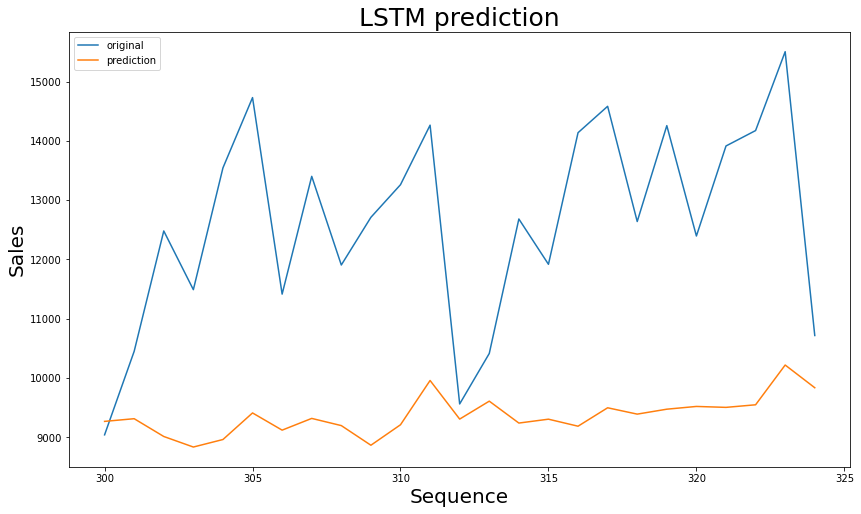

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 141ms/step - loss: 0.6881 - mae: 0.7486


[0.6880980134010315, 0.7485998272895813]